#### Project Topic :  Diabetes Prediction Model
Diabetes is a type of chronic disease which is more common among thepeople of all age groups. Predicting this disease at an early stage can help a person to take the necessary precautions and change his/her lifestyle accordingly to either prevent the occurrence of of this disease or control the disease(For people who already have the disease).


### LIFE CYCLE OF A DATA SCIENCE PROJECT

#### 1. Data Gathering

#### 2. Data Aanlysis

#### 3. Feature Engineering

#### 4. Feature Selection

#### 5. Model Building 

#### 6. HyperParametric Tuning

#### 7. Handling imbalanced dataset

### STEP -1 DATA GATHERING

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.



IMPORTING SOME MODULES

In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\hp\Desktop\DATA EXPOSYS PROJECT\diabetes.csv')

### STEP -2 DATA ANALYSIS

#### 1. MISSING VALUES

#### 2. NUMERICAL FEATURES 

#### 3. DISTRIBUTION OF NUMERICAL FEATURES

#### 4. CATEGORICAL FEATURES

#### 5. DISTINCT CATEGORIES OF THE CATEGORICAL FEATURES 

#### 6. OUTLIERS

#### 7. RELATIONSHIP BETWEEN INDEPENDENT AND DEPENDENT FEATURES

In [3]:
df.shape

(768, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Outcome is the DEPENDENT VARIABLE and Rest are the INDEPENDENT VARIABLES

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

SO this Dataset has no MISSING VALUES

In [8]:
for i in df.columns:
    print(i , " has " , df[i].isnull().mean() , "% missing values")

Pregnancies  has  0.0 % missing values
Glucose  has  0.0 % missing values
BloodPressure  has  0.0 % missing values
SkinThickness  has  0.0 % missing values
Insulin  has  0.0 % missing values
BMI  has  0.0 % missing values
DiabetesPedigreeFunction  has  0.0 % missing values
Age  has  0.0 % missing values
Outcome  has  0.0 % missing values


Finding NUMEERICAL FEATURES 

In [9]:
numerical_features = [column for column in df.columns if df[column].dtypes != 'O']

In [10]:
for column in numerical_features:
    print(column , " is in numeric form")

Pregnancies  is in numeric form
Glucose  is in numeric form
BloodPressure  is in numeric form
SkinThickness  is in numeric form
Insulin  is in numeric form
BMI  is in numeric form
DiabetesPedigreeFunction  is in numeric form
Age  is in numeric form
Outcome  is in numeric form


#### Result : 

All Features are NUMERIC 

#### Checking the Distribution of the Numerical Features

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

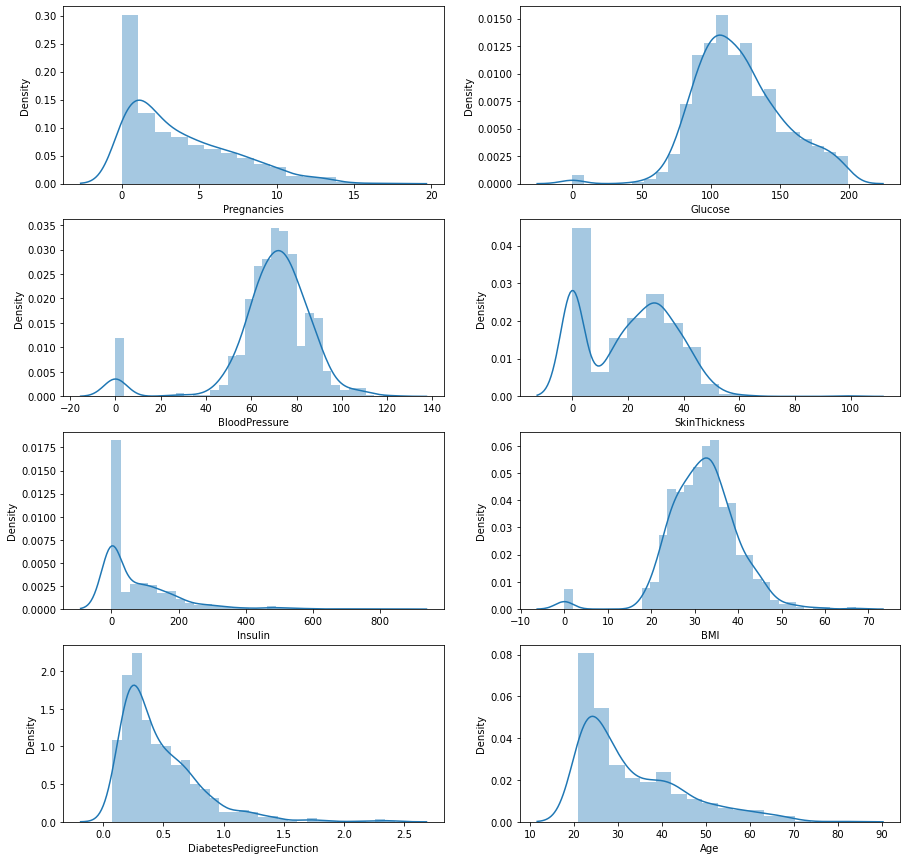

In [11]:
fig , ax = plt.subplots(4 , 2 ,figsize = (15 , 15))

dp = sns.distplot(df['Pregnancies'] , ax = ax[0,0])
dp = sns.distplot(df['Glucose'] , ax = ax[0,1])
dp = sns.distplot(df['BloodPressure'] , ax = ax[1,0])
dp = sns.distplot(df['SkinThickness'] , ax = ax[1,1])
dp = sns.distplot(df['Insulin'] , ax = ax[2,0])
dp = sns.distplot(df['BMI'] , ax = ax[2,1])
dp = sns.distplot(df['DiabetesPedigreeFunction'] , ax = ax[3,0])
dp = sns.distplot(df['Age'] , ax = ax[3,1])

plt.show()

#### Result : 
Glucose , BloodPressure , BMI are almost bell shaped.

Rest are all right skewed.

As This Dataset Has all input FEATURES in CONTINUOUS Form . SO No Need Of Categorizing The Features into 
CONTINUOUS and CATEGORICAL features 

In [12]:
continuous_num_features = [column for column in df.columns if column!='Outcome']

In [13]:
print(continuous_num_features)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


How Many UNIQUE Labels Each FEATURE Have

In [14]:
for column in df.columns:
    print(column ," has " ,len(df[column].unique()) , " unique labels")

Pregnancies  has  17  unique labels
Glucose  has  136  unique labels
BloodPressure  has  47  unique labels
SkinThickness  has  51  unique labels
Insulin  has  186  unique labels
BMI  has  248  unique labels
DiabetesPedigreeFunction  has  517  unique labels
Age  has  52  unique labels
Outcome  has  2  unique labels


#### Result : 

Outcome is the categorical feature

In [15]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### Result : 

It is a IMBALANCED DATASET

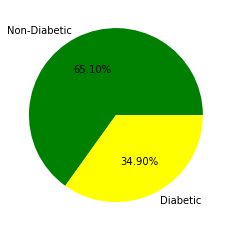

In [16]:
plt.pie(list(df.Outcome.value_counts()) ,colors = ['green' , 'yellow'] , labels = ['Non-Diabetic' , 'Diabetic'] , autopct = '%0.2f%%')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

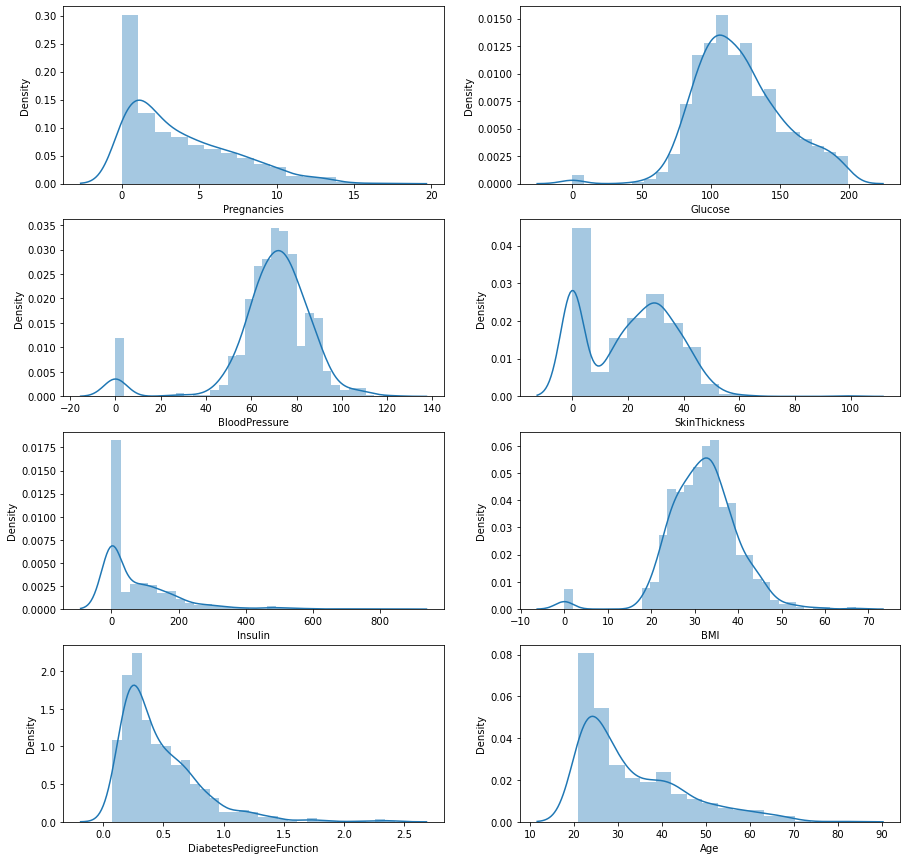

In [17]:
fig , ax = plt.subplots(4 , 2 ,figsize = (15 , 15))

dp = sns.distplot(df['Pregnancies'] , ax = ax[0,0])
dp = sns.distplot(df['Glucose'] , ax = ax[0,1])
dp = sns.distplot(df['BloodPressure'] , ax = ax[1,0])
dp = sns.distplot(df['SkinThickness'] , ax = ax[1,1])
dp = sns.distplot(df['Insulin'] , ax = ax[2,0])
dp = sns.distplot(df['BMI'] , ax = ax[2,1])
dp = sns.distplot(df['DiabetesPedigreeFunction'] , ax = ax[3,0])
dp = sns.distplot(df['Age'] , ax = ax[3,1])

plt.show()

#### Result : 
We can observe that Glucose and BloodPressure are almost bell shaped.

Rest are right skewed.

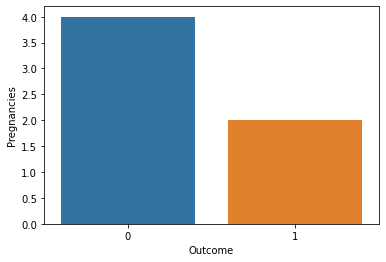

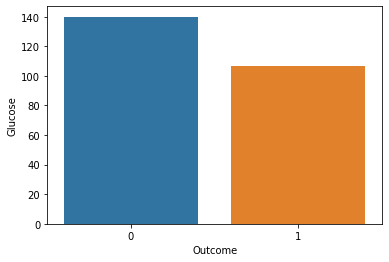

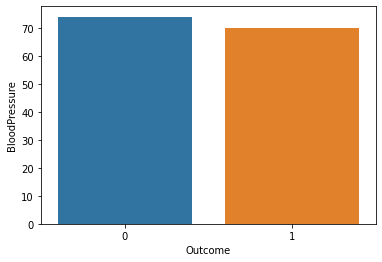

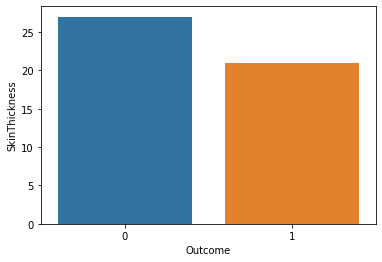

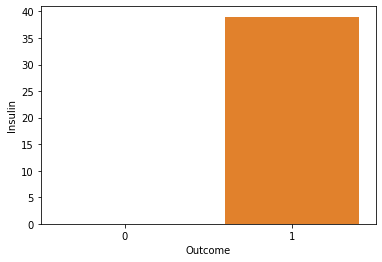

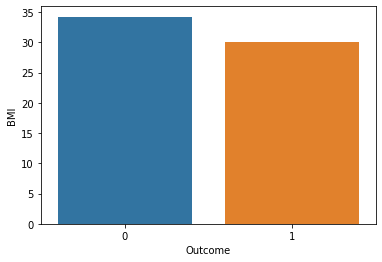

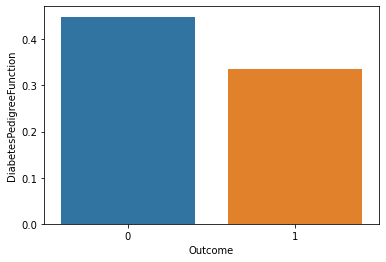

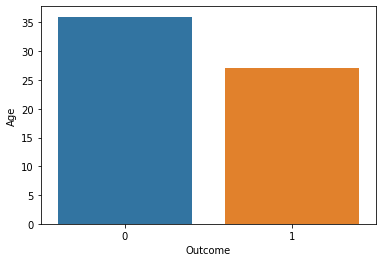

In [18]:
for column in df.columns[:-1]:
    sns.barplot(data = df , x = 'Outcome' , y = df.groupby('Outcome')[column].median().sort_values())
    plt.show()

#### Result : 

This shows the on an average values of features which can have diabetes as it might contains outliers so i have used median() inspite of mean()

Check For OUTLIERS

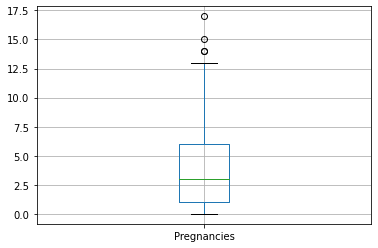

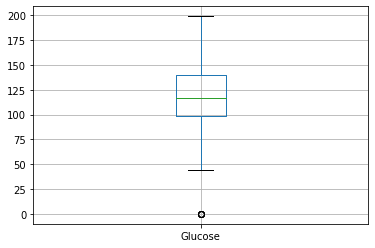

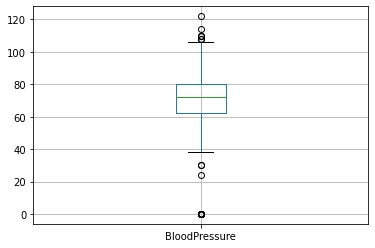

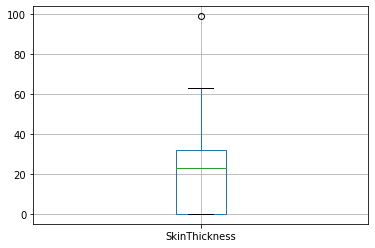

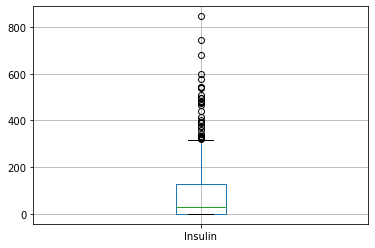

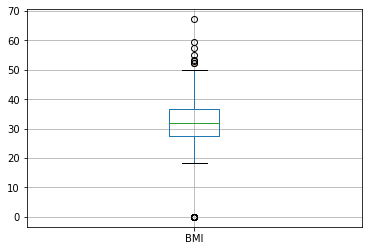

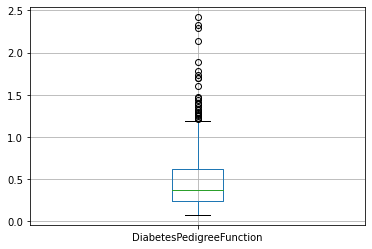

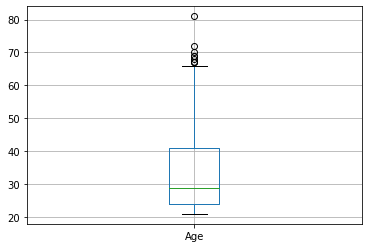

In [19]:
for column in numerical_features[:-1]:
    df.boxplot(column = column)
    plt.show()

#### Result : 
This Dataset has huge no of outliers 

### Step -3 Feature Engineering
#### 1. Missing Values
#### 2. Temporal Variables
#### 3. Categorical Variables : remove rare labels
#### 4. Transform the values of the variables to same range

In [20]:
data = df.copy()

As We Have Seen Above This Dataset Has No Missing Values,So NO ENGG Is Required 

Also This Dataset Has No Date And Time Features Hence , No Temporal Variables are Here   

As We Have Seen Above That This Dataset Has No CATEGORICAL Input Features , So NO NEED Of Engg 

#### As zero values for Pregnancies ,Glucose ,BloodPressure,SkinThickness ,Insulin and BMI are not possible so we have to inpute zero with some appropriate value

Checking How Many Zerors Each Feature Has 

In [21]:
for column in data.columns[: -1]:
    print(column , " has " , len(data[data[column]==0]) , " zeroes")

Pregnancies  has  111  zeroes
Glucose  has  5  zeroes
BloodPressure  has  35  zeroes
SkinThickness  has  227  zeroes
Insulin  has  374  zeroes
BMI  has  11  zeroes
DiabetesPedigreeFunction  has  0  zeroes
Age  has  0  zeroes


In [22]:
# Imputing every feature containing zero values with the medain 

for column in data.columns[:-1]:
    if column=='DiabetesPedigreeFunction' or column=='Age':
        pass
    else:
        data[column] = np.where(data[column]==0 , int(data[column].median()) , data[column])

In [23]:
# Checking whether any zero is left or not 

for column in data.columns[: -1]:
    print(" {} has {} zeroes".format(column , len(data[data[column]==0])))

 Pregnancies has 0 zeroes
 Glucose has 0 zeroes
 BloodPressure has 0 zeroes
 SkinThickness has 0 zeroes
 Insulin has 0 zeroes
 BMI has 0 zeroes
 DiabetesPedigreeFunction has 0 zeroes
 Age has 0 zeroes


In [24]:
# as we have seen above blood pressure is not exactly normally distributed so we will remove outliers of this 
# feature too with skewed method

#### HANDLING OUTLIERS OF FEATURES WHICH ARE RIGHT SKEWED / LEFT SKEWED

### Using IQR(inter quartile range) method to detect and handle the outliers

In [25]:
#List containing right skewed features 

right_skew_feat = [column for column in data.columns[:-1] if column!='Glucose']

#1. Find 25 and 75 percentiles 

for column in right_skew_feat:
    percentile25 = data[column].quantile(.25)
    percentile75 = data[column].quantile(.75)

# Printing the percentiles

    print('25 percentile of ' , column , ' is ' , percentile25 )
    print('75 percentile of ' , column , ' is ' , percentile75 )
    print()

25 percentile of  Pregnancies  is  2.0
75 percentile of  Pregnancies  is  6.0

25 percentile of  BloodPressure  is  64.0
75 percentile of  BloodPressure  is  80.0

25 percentile of  SkinThickness  is  23.0
75 percentile of  SkinThickness  is  32.0

25 percentile of  Insulin  is  30.0
75 percentile of  Insulin  is  127.25

25 percentile of  BMI  is  27.5
75 percentile of  BMI  is  36.6

25 percentile of  DiabetesPedigreeFunction  is  0.24375
75 percentile of  DiabetesPedigreeFunction  is  0.62625

25 percentile of  Age  is  24.0
75 percentile of  Age  is  41.0



In [26]:
#2. Finding IQR , Upper limit and Lower limit values

lower = []
upper =[]
for column in right_skew_feat:
    #25 and 75 percentile
    percentile25 = data[column].quantile(.25)
    percentile75 = data[column].quantile(.75)
    #IQR value
    IQR = round(percentile75-percentile25,3)
    print('IQR for ',column ,' feature is' ,IQR)
    #lower and upper limit 
    lower_limit = round(percentile25 - 1.5 * IQR,3)
    upper_limit = round(percentile75 + 1.5 * IQR,3)
    #printing values
    print('Lower limit for ',column, ' is ',lower_limit)
    print('Upper limit for ',column, ' is ',upper_limit)
    #storing upper and lower limit in a list
    lower.append(lower_limit)
    upper.append(upper_limit)
    
    print()

IQR for  Pregnancies  feature is 4.0
Lower limit for  Pregnancies  is  -4.0
Upper limit for  Pregnancies  is  12.0

IQR for  BloodPressure  feature is 16.0
Lower limit for  BloodPressure  is  40.0
Upper limit for  BloodPressure  is  104.0

IQR for  SkinThickness  feature is 9.0
Lower limit for  SkinThickness  is  9.5
Upper limit for  SkinThickness  is  45.5

IQR for  Insulin  feature is 97.25
Lower limit for  Insulin  is  -115.875
Upper limit for  Insulin  is  273.125

IQR for  BMI  feature is 9.1
Lower limit for  BMI  is  13.85
Upper limit for  BMI  is  50.25

IQR for  DiabetesPedigreeFunction  feature is 0.382
Lower limit for  DiabetesPedigreeFunction  is  -0.329
Upper limit for  DiabetesPedigreeFunction  is  1.199

IQR for  Age  feature is 17.0
Lower limit for  Age  is  -1.5
Upper limit for  Age  is  66.5



In [27]:
#3. Counting no of Outliers that features have:

i = 0
for column in right_skew_feat:
    print(column , ' has total ' , data[(data[column]<lower[i]) | (data[column]>upper[i])].shape[0], 'outliers')
    i += 1

Pregnancies  has total  14 outliers
BloodPressure  has total  14 outliers
SkinThickness  has total  35 outliers
Insulin  has total  49 outliers
BMI  has total  8 outliers
DiabetesPedigreeFunction  has total  29 outliers
Age  has total  9 outliers


There are 2 ways to deal with the outliers of a right skewed/left skewed feature
1. Trimming
2. Capping

I am going to prefer 2nd way as 1st method can remove important values from the dataset 

In [28]:
#4. Now imputing the outliers with the valid values

i =0
for column in right_skew_feat:
    data[column] = np.where(
        # Changing values which are greater than mu+3*sigma with the upper limit 
        data[column]>upper[i],upper[i],
        # Changing values which are smaller than mu-3*sugma with the lower limit 
        np.where(data[column]<lower[i], lower[i] , data[column])
    )
    i+=1

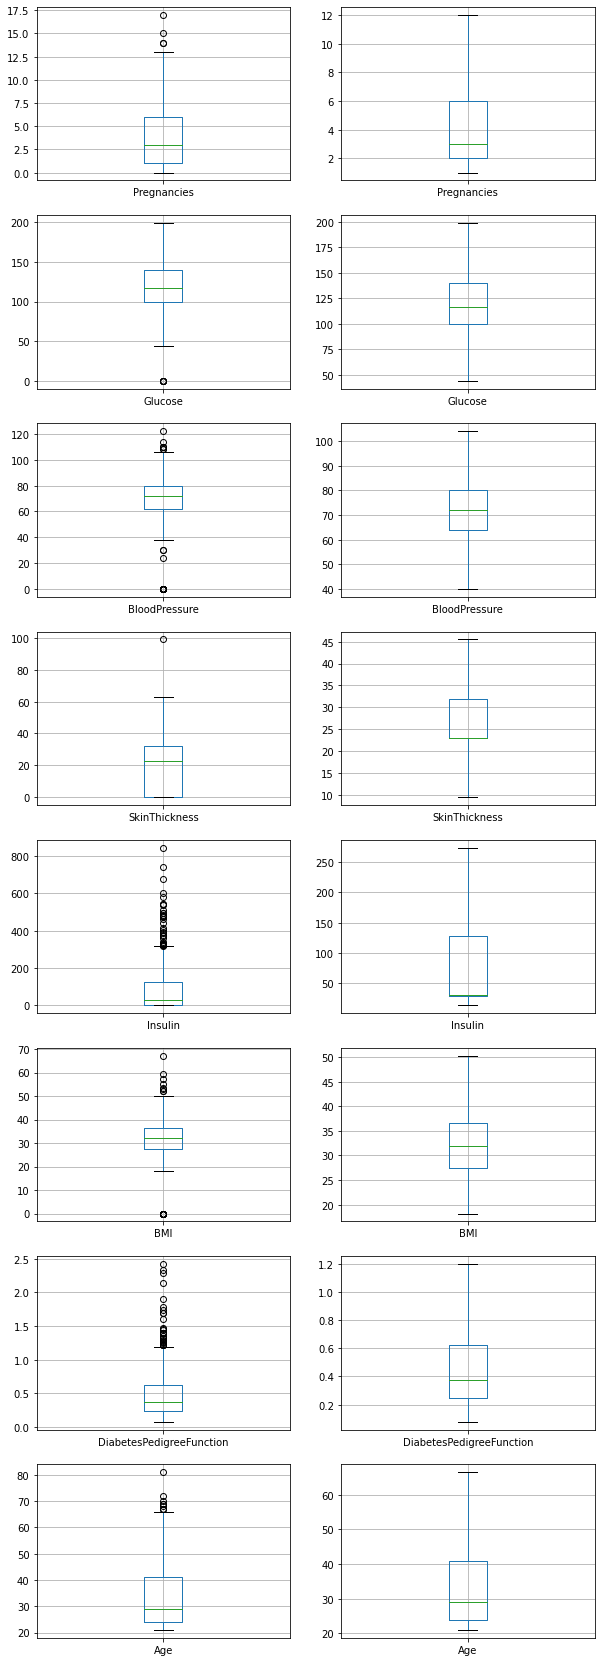

In [29]:
# Outliers before and after imputation Outliers 

fig , ax = plt.subplots(8 , 2 ,figsize = (10,30))

i = 0

for column in df.columns[:-1]:
    bp = df.boxplot(column = column , ax = ax[i,0])
    bp = data.boxplot(column = column , ax = ax[i,1])
    
    i+=1
plt.show()

#### Result :

No outlier is left

#### As the dataset is not Normally Distributed so I will Normalize all the input features 

In [30]:
# Categorizing the dependent and independent features 

X = data.drop('Outcome' ,axis =1)
y = data['Outcome']

In [31]:
# Normalizing the Independent features

from sklearn.preprocessing import MinMaxScaler

norm_form = MinMaxScaler()
norm_form  = pd.DataFrame(norm_form.fit_transform(X) , columns = data.columns[:-1])

norm_form.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.454545,0.670968,0.50000,0.708333,0.061746,0.480499,0.489741,0.637363
1,0.000000,0.264516,0.40625,0.541667,0.061746,0.262090,0.243533,0.219780
2,0.636364,0.896774,0.37500,0.375000,0.061746,0.159126,0.529884,0.241758
3,0.000000,0.290323,0.40625,0.375000,0.308731,0.308892,0.079393,0.000000
4,0.181818,0.600000,0.00000,0.708333,0.594308,0.776911,1.000000,0.263736
5,0.363636,0.464516,0.53125,0.375000,0.061746,0.230889,0.109723,0.197802
6,0.181818,0.219355,0.15625,0.625000,0.285576,0.399376,0.151650,0.109890
7,0.818182,0.458065,0.50000,0.375000,0.061746,0.533541,0.049955,0.175824
8,0.090909,0.987097,0.46875,0.986111,1.000000,0.383775,0.071365,0.703297
9,0.636364,0.522581,0.87500,0.375000,0.061746,0.430577,0.137377,0.725275


In [32]:
# adding the dependent features to the noram_form df

norm_form['Outcome'] = data['Outcome']

In [33]:
# splitting the dataset into 70:30

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X,y,test_size = 0.3,random_state=0)

### STEP - 5 MODEL BUILDING STEP - 6 HYPER TUNING , STEP - 7 HANDLING IMBALANCED DATASET

#### Step 5 : Model Building
1. logistic regression
2. k nearest neighbor
3. Support Vector Machine
4. Decision Tree
5. Random forest 

#### Step 6 : Hyper Parametric tuning 
1. GridSearchCV
2. RandomizedSearchCV
3. Bayesian Optimization -Automate Hyperparameter Tuning (Hyperopt)
4. Sequential Model Based Optimization(Tuning a scikit-learn estimator with skopt)
5. Optuna- Automate Hyperparameter Tuning
6. Genetic Algorithms (TPOT Classifier)

#### Step 7 : Handling Imbalanced Dataset
#### RESAMPLING TECHNIQUES
1. Random Under-Sampling
2. Random Over-Sampling
3. Random under-sampling with imblearn
4. Random over-sampling with imblearn
5. Synthetic Minority Oversampling Technique (SMOTE)
6. NearMiss
7. Penalize Algorithms (Cost-Sensitive Training)



In [34]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from collections import Counter
from imblearn.combine import SMOTETomek

In [35]:
# output function will calculate predicted y , compute confusion matrix , accuracy score,
# classification report 

# recall_val will contain list of recall values 
recall_val = []
# confusion_mat_list will contain list of confusion matrix
confusion_mat_list = []

def output(model):
    y_pred = model.predict(x_test)
    
    global recall ,confusion_mat_list
    conf_mat = confusion_matrix(y_test,y_pred)
    recall = round((conf_mat[1][1]) / (conf_mat[1][0]+conf_mat[1][1]), 3)
    recall_val.append(recall)
    confusion_mat_list.append(conf_mat)
    
    print('Confusion Matrix is ')
    print(conf_mat)
    print()
    print('Accuracy score is ')
    print(accuracy_score(y_test,y_pred))
    print()
    print('Classification Report')
    print(classification_report(y_test,y_pred))



In [36]:
# here hypertuning of the parameters to get best accuracy model by grid search cv as well 
# as using kfold too
# and then fitting the model 

def model_building(model , param_grid,x_train,y_train):
    cv = KFold(n_splits = 5,random_state =None, shuffle = False)
    #making object gscv_model public
    global gscv_model 
    gscv_model = GridSearchCV(model , param_grid , cv = cv,n_jobs =-1,scoring = 'recall')
    #fitting the model
    gscv_model.fit(x_train,y_train)

In [37]:
# using smote technique

def smotomek(x_train,y_train):
    os = SMOTETomek(0.75)
    global x_train_os , y_train_os 
    
    x_train_os , y_train_os  = os.fit_resample(x_train,y_train)
    
    print('the no of classes before fit {}'.format(Counter(y_train)))
    print('the no of classes after fit {}'.format(Counter(y_train_os)))

In [38]:
# fit the model will just fill the model created by smotomek

def fit_and_output_of_model(model , x_train , y_train):
    
    model = model
    print('After using Smotomek technique')
    model.fit(x_train , y_train)
    output(model)

#### APPLYING LOGISTIC REGRESSION ALGORITHM

In [39]:
from sklearn.linear_model import LogisticRegression 

param_gridL = {'C' : 10.0** np.arange(-2,3),'penalty': ['l1','l2']}

In [40]:
model_building(LogisticRegression() , param_gridL,x_train,y_train)

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.5541315         nan 0.57118223        nan 0.57977082
        nan 0.56911016        nan 0.54680417]
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
# calling output
output(gscv_model)

Confusion Matrix is 
[[139  18]
 [ 34  40]]

Accuracy score is 
0.7748917748917749

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.69      0.54      0.61        74

    accuracy                           0.77       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.77      0.77      0.77       231



In [42]:
smotomek(x_train,y_train)

the no of classes before fit Counter({0: 343, 1: 194})
the no of classes after fit Counter({0: 315, 1: 229})


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [43]:
fit_and_output_of_model(gscv_model , x_train_os , y_train_os)

After using Smotomek technique
Confusion Matrix is 
[[132  25]
 [ 36  38]]

Accuracy score is 
0.7359307359307359

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       157
           1       0.60      0.51      0.55        74

    accuracy                           0.74       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.73      0.74      0.73       231



C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.72117012        nan 0.6815829         nan 0.69246595
        nan 0.69447741        nan 0.69513262]
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### APLLYING KNN ALGORITHM

In [44]:
from sklearn.neighbors import KNeighborsClassifier

param_gridK = {'weights' : ['uniform', 'distance'],
             'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'n_neighbors' : [i for i in range(5,50,2)]
             }

In [45]:
model_building(KNeighborsClassifier() , param_gridK,x_train,y_train)

In [46]:
output(gscv_model)

Confusion Matrix is 
[[134  23]
 [ 36  38]]

Accuracy score is 
0.7445887445887446

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       157
           1       0.62      0.51      0.56        74

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.74      0.74      0.74       231



In [47]:
smotomek(x_train,y_train)

the no of classes before fit Counter({0: 343, 1: 194})
the no of classes after fit Counter({0: 314, 1: 228})


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [48]:
fit_and_output_of_model(gscv_model , x_train_os , y_train_os)

After using Smotomek technique
Confusion Matrix is 
[[125  32]
 [ 29  45]]

Accuracy score is 
0.7359307359307359

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       157
           1       0.58      0.61      0.60        74

    accuracy                           0.74       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.74      0.74      0.74       231



#### APPLYING SVM ALGORITHM

In [49]:
from sklearn.svm import SVC

In [50]:
param_gridS = {
       'gamma': [0.0001,0.0002,0.0003,0.0004,0.0005, 'auto'],
       'decision_function_shape' : ['ovo', 'ovr'] ,
       'C' : [i for i in np.arange(1.0,10.0)],
       'degree' : [i for i in range(3,10)]
       }

In [51]:
model_building( SVC() , param_gridS ,x_train,y_train)

In [52]:
output(gscv_model)

Confusion Matrix is 
[[135  22]
 [ 40  34]]

Accuracy score is 
0.7316017316017316

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       157
           1       0.61      0.46      0.52        74

    accuracy                           0.73       231
   macro avg       0.69      0.66      0.67       231
weighted avg       0.72      0.73      0.72       231



In [53]:
smotomek(x_train,y_train)

the no of classes before fit Counter({0: 343, 1: 194})
the no of classes after fit Counter({0: 316, 1: 230})


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [54]:
fit_and_output_of_model(gscv_model ,x_train_os,y_train_os)

After using Smotomek technique
Confusion Matrix is 
[[126  31]
 [ 28  46]]

Accuracy score is 
0.7445887445887446

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       157
           1       0.60      0.62      0.61        74

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.75      0.74      0.75       231



#### APPLYING DECISION TREE ALGORITHM

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
param_gridD = {'criterion' : ["gini", "entropy"],
             'max_depth' : [None ,10,5,6,7],
             }

In [57]:
model_building(DecisionTreeClassifier() , param_gridD,x_train,y_train )

In [58]:
output(gscv_model)

Confusion Matrix is 
[[131  26]
 [ 26  48]]

Accuracy score is 
0.7748917748917749

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       157
           1       0.65      0.65      0.65        74

    accuracy                           0.77       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231



In [59]:
fit_and_output_of_model(gscv_model ,x_train_os,y_train_os)

After using Smotomek technique
Confusion Matrix is 
[[103  54]
 [ 17  57]]

Accuracy score is 
0.6926406926406926

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.66      0.74       157
           1       0.51      0.77      0.62        74

    accuracy                           0.69       231
   macro avg       0.69      0.71      0.68       231
weighted avg       0.75      0.69      0.70       231



#### APPLYING RANDOM FOREST ALGORITHM 

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
param_gridR = {
              'max_depth' : [None , 10 , 4,5,6,7,8,9],
              'criterion' : ["gini", "entropy"],
              'max_features' : ["auto", "sqrt", "log2"]
             }

In [62]:
model_building(RandomForestClassifier() , param_gridR , x_train , y_train)

In [63]:
output(gscv_model)

Confusion Matrix is 
[[137  20]
 [ 39  35]]

Accuracy score is 
0.7445887445887446

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       157
           1       0.64      0.47      0.54        74

    accuracy                           0.74       231
   macro avg       0.71      0.67      0.68       231
weighted avg       0.73      0.74      0.73       231



In [64]:
smotomek(x_train,y_train)

the no of classes before fit Counter({0: 343, 1: 194})
the no of classes after fit Counter({0: 314, 1: 228})


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [65]:
fit_and_output_of_model(gscv_model , x_train_os , y_train_os)

After using Smotomek technique
Confusion Matrix is 
[[140  17]
 [ 32  42]]

Accuracy score is 
0.7878787878787878

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       157
           1       0.71      0.57      0.63        74

    accuracy                           0.79       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.78      0.79      0.78       231



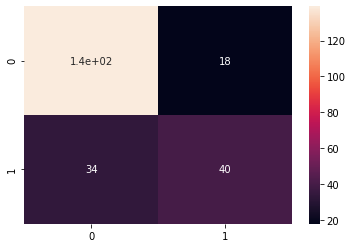

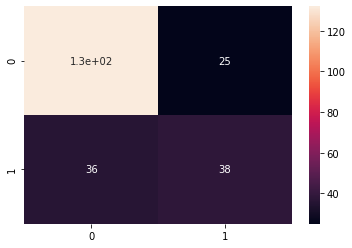

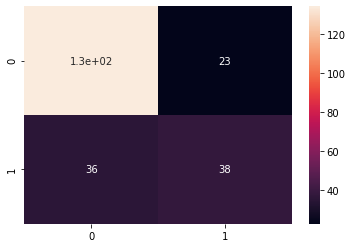

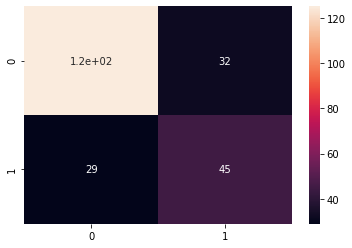

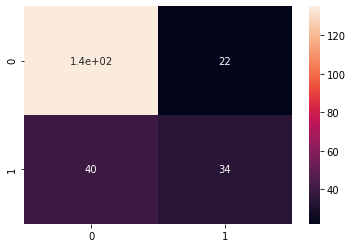

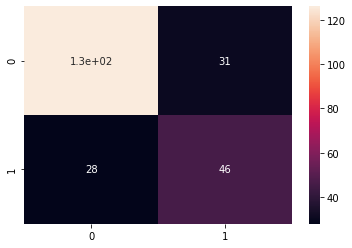

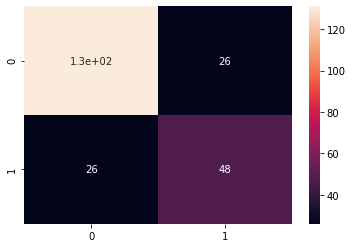

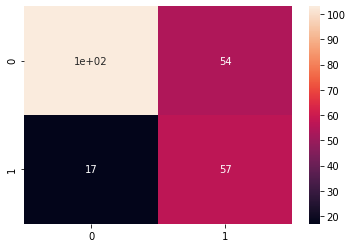

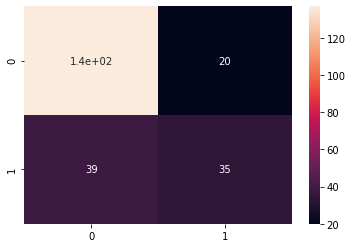

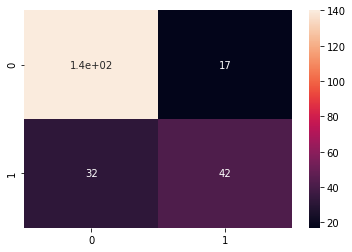

In [66]:
# Lets visualize the confusion matrix

for conf_mat in confusion_mat_list:
    sns.heatmap(conf_mat , annot = True)
    plt.show()

In [67]:
recall_val

[0.541, 0.514, 0.514, 0.608, 0.459, 0.622, 0.649, 0.77, 0.473, 0.568]

In [68]:
models = ['Logr' , 'Lr_S' , 'knn','knn_S' ,'Svm' ,'Svm_S' ,'Dtree' , 'Dt_S' , 'Rfor' , 'Rfor_S']

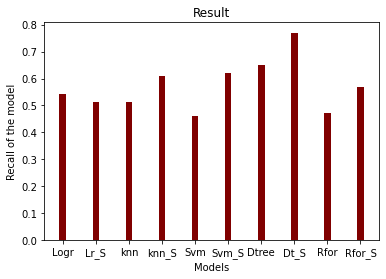

In [69]:
plt.xlabel('Models')
plt.ylabel('Recall of the model')
plt.title('Result')
plt.bar(models , recall_val ,width = 0.2 ,color = 'maroon')
plt.show()

#### Result :

Decision Tree has given the higest recall : 0.77
It implies that this algorithm predicts the most true positive values


SO AT THE END ,
#### RESULT is DECISION TREE AFTER HYPER TUNING AND THEN USING SMOTOMEK METHOD GIVES THE HIGHEST RECALL 